In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from numpy import linalg as LA

##Задача 1 Площадь.

Допишите функцию, которая по трём точкам a, b, c вычисляет площадь 
треугольника с вершинами в этих точках. Все точки заданы радиус-векторами в n-мерном евклидовом пространстве, в виде массивов np.array.

In [2]:
def S_triangle(a, b, c):
    ab = b - a
    ac = c - a
    
    u = ab
    v = ac - (np.dot(ac, u) / np.dot(u, u)) * u
    
    area_squared = np.dot(u,u) * np.dot(v,v)
    S = 0.5 * area_squared**0.5
    return S

a = np.array([0, 0])
b = np.array([2, 0])
c = np.array([1, 1])
print(S_triangle(a,b,c))

1.0


##Задача 2  В треугольнике.

Допишите функцию, которая по трём точкам `a`, `b`, `c` и точке `x` проверяет, лежит ли `x` в треугольнике с вершинами `a`, `b`, `c`. Все точки заданы радиус-векторами в двумерном евклидовом пространстве. Функция должна работать правильно независимо от того, подаются на вход векторы в виде списков или массивов numpy.

In [3]:
def in_triangle(x, a, b, c):
    '''Вернуть True, если x лежит в треугольнике abc, и False, если нет'''
    x = np.array(x)
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    def cross_product(p1, p2):
            return p1[0] * p2[1] - p1[1] * p2[0]

    cp1 = cross_product(b - a, x - a)
    cp2 = cross_product(c - b, x - b)
    cp3 = cross_product(a - c, x - c)

    return (cp1 >= 0 and cp2 >= 0 and cp3 >= 0) or (cp1 <= 0 and cp2 <= 0 and cp3 <= 0)

a = np.array([0, 0])
b = np.array([2, 0])
c = np.array([1, 1])
x = [0.5, 0.5]
print(in_triangle(x, a, b, c))
x = [2.5, 0.5]
print(in_triangle(x, a, b, c))

True
False


##Задача 3  Верхне-треугольная матрица и матричная экспонента.

Создайте матрицу $A$ размера $32 \times 32$, задаваемую следующей формулой:
$$
A_{i j}=-\delta_{i, j}+\delta_{i, j-1}+\delta_{i, j-2}
$$
- Найдите спектр матрицы $A$. Выведите его на экран.
- Используя функцию scipy.linalg.expm, постройте $\left\|e^{A t}\right\|_{2}$ как функцию $t$ на интервале $0 \leq t \leq 50 .$ 

Спектр матрицы A:
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


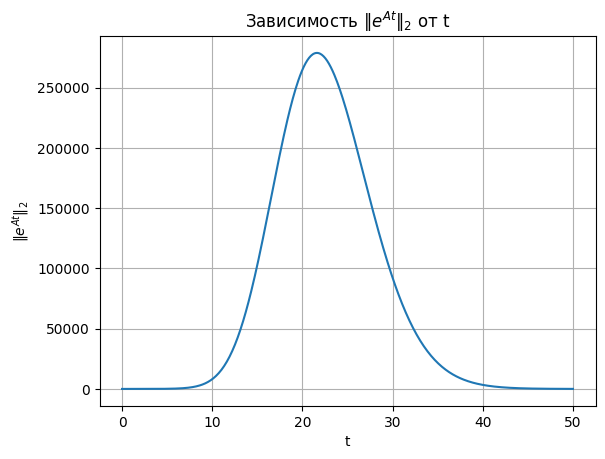

In [4]:
n = 32
A = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = -int(i == j) + int(i == j - 1) + int(i == j - 2)

spectr = np.linalg.eigvals(A)
print("Спектр матрицы A:\n", spectr)

t_values = np.linspace(0, 50, 500)
norm_values = []
for t in t_values:
    exp_At = scipy.linalg.expm(A * t)
    norm = np.linalg.norm(exp_At, ord=2)
    norm_values.append(norm)

plt.plot(t_values, norm_values)
plt.xlabel("t")
plt.ylabel(r"$\|e^{At}\|_2$")
plt.title(r"Зависимость $\|e^{At}\|_2$ от t")
plt.grid(True)
plt.show()

##Задача 4  Прокрустово преобразование.

Прокрустово преобразование.  

Цель задания - максимально хорошо "подогнать" одну фигуру под другую трансляцией плоскости и поворотом.

Пусть $\mathbf{X}_{1}$ и $\mathbf{X}_{2}-n \times 2$ матрицы, содержащие $n \ x, y$-координат точек первой и второй фигур соответственно. Задача сводится к минимизации "прокрустова расстояния" между фигурами $min(\vec{\mu}, \mathbf{R})\left\|\mathbf{X}_{2}-\left(\mathbf{X}_{1} \mathbf{R}-\mathbf{1} \vec{\mu}^{T}\right)\right\|_{F}$, где 
$\|\mathbf{X}\|_{F}=\operatorname{tr}\left(\mathbf{X}^{T} \mathbf{X}\right)-$ норма Фробениуса, 

$\mathbf{R}-2 \times 2$ ортогональная матрица поворота, 

$\vec{\mu}$ - двумерный вектор трансляции в плоскости, 

$\mathbf{1}$ - столбец из $n$ единиц.


Пусть $\bar{x}_{1}, \bar{x}_{2}-$ двумерные векторы, содержащие среднее по каждому из двух столбцов матриц $\mathbf{X}_{1}$ и $\mathbf{X}_{2} .$ Центрируем $\mathbf{X}_{1}$ и $\mathbf{X}_{2}$ , то есть вычтем из них среднее по столбцам, и используем SVD:   

\begin{gathered}
\widetilde{\boldsymbol{X}}_{1}=\boldsymbol{X}_{\mathbf{1}}-\mathbf{1} \cdot \tilde{\mathrm{x}}_{1}^{\mathrm{T}}, \quad \widetilde{\boldsymbol{X}}_{2}=\boldsymbol{X}_{2}-\mathbf{1} \cdot \tilde{\mathrm{x}}_{2}^{\mathrm{T}}
 \\
 \widetilde{\boldsymbol{X}}_{1}^{\mathrm{T}} \widetilde{\boldsymbol{X}}_{2}=\mathbf{U D V}^{\mathrm{T}}
\end{gathered}

Тогда решение поставленной задачи даётся формулами:

$$
\vec{\mu}=\bar{x}_{2}-\mathbf{R}^{T} \bar{x}_{1}, \quad \mathbf{R}=\mathbf{U V}^{T}
$$

Используя эти формулы, напишите программу, которая подгоняет одну фигуру под другую и визуализирует результат. Координаты точек фигуры в файле signatureData2.csv .

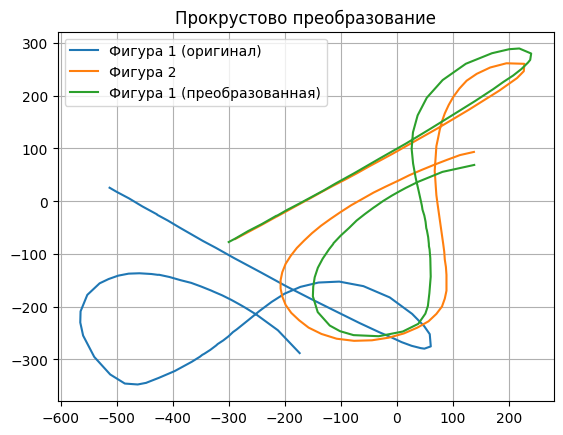

In [5]:
data = np.loadtxt('signatureData.csv', delimiter=',', skiprows=1)

x1 = np.array([np.mean(data[:, 0]), np.mean(data[:, 1])])
x2 = np.array([np.mean(data[:, 2]), np.mean(data[:, 3])])
X1 = np.array(data[:, 0])
Y1 = np.array(data[:, 1])
X2 = np.array(data[:, 2])
Y2 = np.array(data[:, 3])

XY1 = np.vstack((X1, Y1)).T
XY2 = np.vstack((X2, Y2)).T

XY1_centered = XY1 - x1
XY2_centered = XY2 - x2

U, D, VT = np.linalg.svd(XY1_centered.T @ XY2_centered)
R = U @ VT
mu = x2 - R.T @ x1

XY1_transformed = XY1 @ R + mu


plt.plot(X1, Y1, label='Фигура 1 (оригинал)')
plt.plot(X2, Y2, label='Фигура 2')
plt.plot(XY1_transformed[:, 0], XY1_transformed[:, 1], label='Фигура 1 (преобразованная)')
plt.legend()
plt.title('Прокрустово преобразование')
plt.grid(True)
plt.show()

##Задача 5  Метод Якоби.

(20) Реализуйте метод итераций для решения системы линейных уравнений (метод Якоби). Для этого перепишите уравнение $A x=b$, выделив диагональную часть матрицы $A:$
$$
A=D+(A-D) \text {, }
$$
в виде
$$
x_{n+1}=B x_{n}+c
$$
где $B=D^{-1}(D-A) .$ 

Найдите $c . $ 
Создавайте случайную матрицу с диагональным доминированием следующим способом:

n=10

A = rnd.uniform (size=(n,n))+np.diag([15]*n)

b = rnd.uniform (size=n)

Вычислите норму L2 (евклидову) соответствующей матрицы $B$ и выполните 22 итерации метода Якоби, распечатывая вектор х через каждые три итерации. В качестве начального приближения возьмите вектор из единиц. Убедитесь, что результируюший вектор $x$ действительно решает исходную систему.
Матрица $A$, с которой вы работали выше, по построению доминируется диагональю. Что произойдёт, если уменьшать величину диагональных элементов? Проверьте сходимость итераций Якоби (вычислите также норму матрицы $B$ ).

In [6]:

rnd = np.random. RandomState(1234)
n=10
A = rnd.uniform (size=(n,n))+np.diag([15]*n)
b = rnd.uniform (size=n)

D = np.diag(np.diag(A))

B = np.linalg.inv(D) @ (D - A)
c = np.linalg.inv(D) @ b

norm_B = LA.norm(B, ord=2)
print("Норма L2 матрицы B:", norm_B)


x = np.ones(n)

for i in range(22):
    x = B @ x + c
    if i % 3 == 0:
        print(f"Итерация {i+1}: x = {x}")


print("\nПроверка решения:")
print("Ax - b =", A @ x - b)

Норма L2 матрицы B: 0.31853784252598116
Итерация 1: x = [-0.33196517 -0.26770109 -0.27910569 -0.36012482 -0.12640244 -0.33279362
 -0.20812078 -0.2036245  -0.34221675 -0.23267867]
Итерация 4: x = [ 0.04921351  0.04638374  0.05117981  0.03402344  0.06275166  0.00806704
 -0.00033033  0.03840467  0.00467334  0.06056458]
Итерация 7: x = [ 0.03892397  0.03756906  0.04260708  0.02338002  0.05730725 -0.00052814
 -0.00591976  0.03159672 -0.00446858  0.05263819]
Итерация 10: x = [ 0.03920158  0.03780661  0.0428384   0.02366705  0.05745417 -0.00029635
 -0.00576883  0.03178032 -0.00422201  0.0528521 ]
Итерация 13: x = [ 0.03919409  0.0378002   0.04283216  0.0236593   0.05745021 -0.0003026
 -0.0057729   0.03177536 -0.00422866  0.05284633]
Итерация 16: x = [ 0.03919429  0.03780037  0.04283232  0.02365951  0.05745032 -0.00030243
 -0.00577279  0.0317755  -0.00422848  0.05284649]
Итерация 19: x = [ 0.03919429  0.03780037  0.04283232  0.02365951  0.05745031 -0.00030244
 -0.00577279  0.03177549 -0.004228

In [7]:

print("\nЭксперимент с уменьшением диагональных элементов:")
for diag_val in [10, 1, 0.1]:
    A_new = rnd.uniform(size=(n, n)) + np.diag([diag_val] * n)
    D_new = np.diag(np.diag(A_new))
    B_new = np.linalg.inv(D_new) @ (D_new - A_new)
    c_new = np.linalg.inv(D_new) @ b
    norm_B_new = LA.norm(B_new, ord=2)

    print(f"\nДиагональное значение: {diag_val}")
    print("Норма L2 матрицы B:", norm_B_new)

    x_new = np.ones(n)
    for i in range(22):
        x_new = B_new @ x_new + c_new


    print(f"Итерация {22}: x = {x_new}")
    print("Ax - b =", A_new @ x_new - b)


Эксперимент с уменьшением диагональных элементов:

Диагональное значение: 10
Норма L2 матрицы B: 0.46233577580355595
Итерация 22: x = [ 0.05618385  0.05044115  0.06416421  0.04130921  0.07493259 -0.01335171
 -0.01554379  0.03738685 -0.00315062  0.06898852]
Ax - b = [2.12742241e-07 1.54219211e-07 1.61394674e-07 1.64762006e-07
 2.54499860e-07 2.79399241e-07 2.33458916e-07 1.79366847e-07
 1.79471296e-07 2.39274900e-07]

Диагональное значение: 1
Норма L2 матрицы B: 3.2797894539967225
Итерация 22: x = [3.16706025e+10 2.66662050e+10 1.70845746e+10 9.08124884e+09
 2.05159959e+10 2.28873436e+10 1.45928595e+10 1.53031434e+10
 1.99863000e+10 2.26697113e+10]
Ax - b = [1.35494337e+11 1.06596127e+11 1.18433927e+11 5.73075558e+10
 1.26816392e+11 1.56139554e+11 1.12442776e+11 1.03949366e+11
 1.28470248e+11 1.24776067e+11]

Диагональное значение: 0.1
Норма L2 матрицы B: 23.823880679495307
Итерация 22: x = [2.44573292e+24 4.92518137e+24 7.01071577e+24 2.53390384e+25
 2.50492707e+25 4.01382769e+24 3.06

Если уменьшать диагональные элементы, то метод не сходится